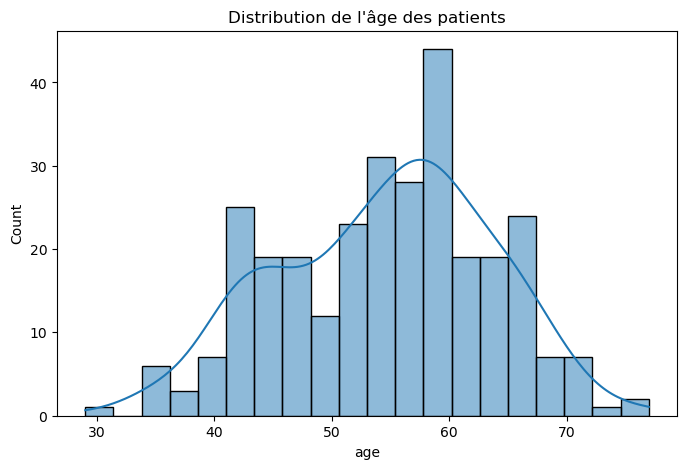

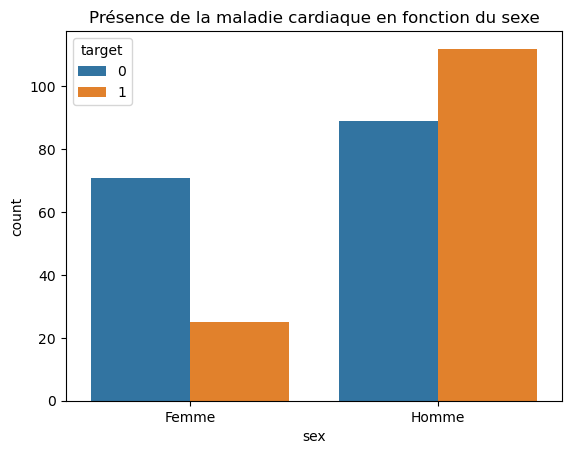

C:\Users\CARINE\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\CARINE\AppData\Local\Temp\ipykernel_18036\335427714.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modèle", y="Accuracy", data=df_results, palette="viridis")


                Modèle  Accuracy  Précision    Rappel  F1-Score   AUC-ROC
0  Logistic Regression  0.866667   0.833333  0.833333  0.833333  0.942130
1                  KNN  0.833333   0.818182  0.750000  0.782609  0.932292
2                  SVM  0.883333   0.869565  0.833333  0.851064  0.952546
3        Decision Tree  0.833333   0.750000  0.875000  0.807692  0.840278
4        Random Forest  0.883333   0.840000  0.875000  0.857143  0.937500
5             AdaBoost  0.866667   0.833333  0.833333  0.833333  0.922454


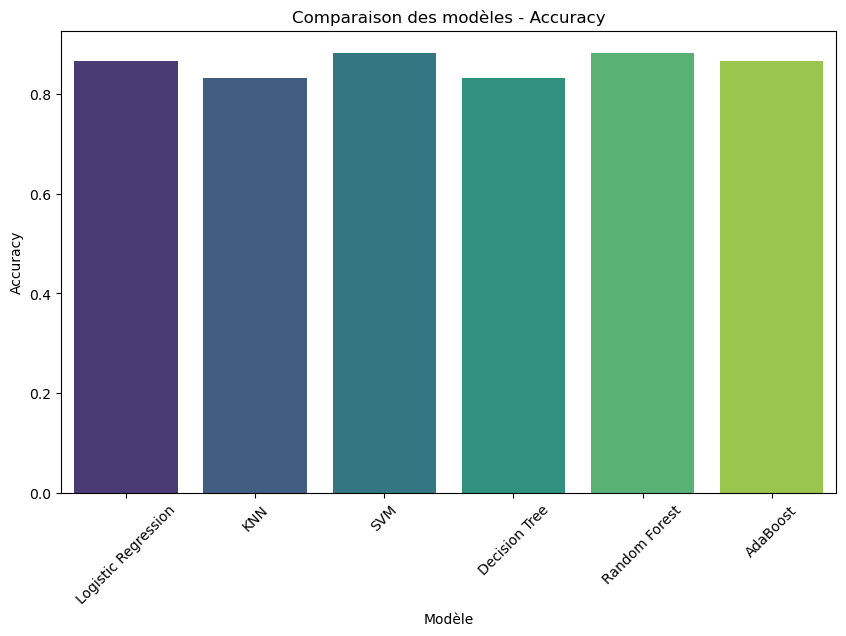

C:\Users\CARINE\AppData\Local\Temp\ipykernel_18036\335427714.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modèle", y="AUC-ROC", data=df_results, palette="magma")


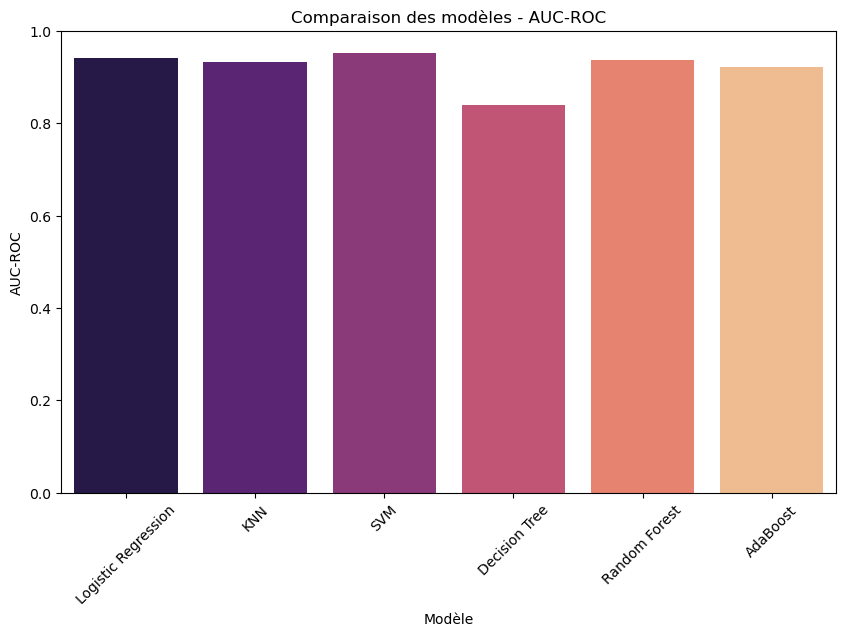

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Charger le dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names)

# Remplacement des valeurs '?' par NaN et conversion en float
df.replace("?", np.nan, inplace=True)
df = df.astype(float)
df.dropna(inplace=True)

# Correction de la cible (1 = maladie, 0 = pas de maladie)
df["target"] = (df["target"] > 0).astype(int)

# Analyse exploratoire
def plot_distribution(df, column, title):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(title)
    plt.show()

plot_distribution(df, "age", "Distribution de l'âge des patients")

# Analyse de la présence de la maladie par sexe
sns.countplot(data=df, x="sex", hue="target")
plt.xticks([0, 1], ["Femme", "Homme"])
plt.title("Présence de la maladie cardiaque en fonction du sexe")
plt.show()

# Préparation des données
X = df.drop(columns=["target"])
y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraînement des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Rappel": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    })

df_results = pd.DataFrame(results)
print(df_results)

# Affichage des résultats sous forme de tableau
plt.figure(figsize=(10, 6))
sns.barplot(x="Modèle", y="Accuracy", data=df_results, palette="viridis")
plt.xticks(rotation=45)
plt.title("Comparaison des modèles - Accuracy")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Modèle", y="AUC-ROC", data=df_results, palette="magma")
plt.xticks(rotation=45)
plt.title("Comparaison des modèles - AUC-ROC")
plt.show()
